# GrowthLink Data Science Assignment

## Problem Statement
**Task 1: Titanic Survival Prediction**

- Develop a machine learning model to predict whether a passenger survived the Titanic disaster.
- Dataset includes features like age, gender, ticket class, fare, cabin information etc.
- Handle missing values, encode categorical variables, and normalize numerical data effectively.
- Evaluate model performance using accuracy, precision, etc.
- Expected outcome: A well-trained classification model with strong survival prediction accuracy.
- Submit a GitHub repository with structured code, preprocessing steps, model selection, and performance analysis in 
  the README

# Exploratory Data Analysis [EDA]

<img id="dimg_B1i4Z-30CsOMseMPpbme6Qw_253" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSH-8IEfKx4zN0mfHIPq1v2ehQqoXQCO8nQqg&amp;s" class="YQ4gaf" height="168" style="object-position:30% 60%" width="300" alt="Machine Learning Career Track ..." data-ilt="1740134413306">

**1. Import the necessary packages**

In [7]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

**2. Read the dataset**

In [10]:
data = pd.read_csv(r"C:\Users\ajcho\OneDrive\Desktop\full stack data science and AI\BY SELF\Projects\Growthlink task\tested.csv")
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


**3. Categorical and Numerical columns cheak**

- Data Quick checks
    - Shape - [shape]
    - Size - [size]
    - Length - [len]
    - Data type - [dtypes]
    - head
    - tail
    - info

In [14]:
cat_cols=(data.select_dtypes(include='object').columns)
num_cols=(data.select_dtypes(exclude='object').columns)
cat_cols,num_cols

(Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object'),
 Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object'))

> Data Quick checks

In [17]:
#shape 
print(f'Shape of Dataset:{data.shape}')
#size 
print(f'Size of dataset:{data.size}')
#length
print(f'Length of Dataset:{len(data)}')
#dtypes
data.dtypes

Shape of Dataset:(418, 12)
Size of dataset:5016
Length of Dataset:418


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [19]:
#Top five rows
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [21]:
# last five rows 
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [23]:
# info  
# provide all information about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


**4. Missing value analysis**
- isnull()
- isnull().sum()

In [26]:
# isnull
data.isnull()   # it return true if null value , else false

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
413,False,False,False,False,False,True,False,False,False,False,True,False
414,False,False,False,False,False,False,False,False,False,False,False,False
415,False,False,False,False,False,False,False,False,False,False,True,False
416,False,False,False,False,False,True,False,False,False,False,True,False


In [28]:
#isnull().sum()
data.isnull().sum()    #count if null value

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [30]:
# as we can see age and Fare columns have missing value 
# now fill these values with some methods 
# there are many methods like 'bfill,backfill,ffill,pad,mean,median,mode'

**Data Preprocessing**

In [35]:
# Drop irrelevant columns
data.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [39]:
# Fill missing values
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Fare'].fillna(data['Fare'].median(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)


C:\Users\ajcho\AppData\Local\Temp\ipykernel_23520\2050350557.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)
C:\Users\ajcho\AppData\Local\Temp\ipykernel_23520\2050350557.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F

**5. Data quaility cheak and cleaning**

In [42]:
data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,0,3,male,34.5,0,0,7.8292,Q
1,893,1,3,female,47.0,1,0,7.0000,S
2,894,0,2,male,62.0,0,0,9.6875,Q
3,895,0,3,male,27.0,0,0,8.6625,S
4,896,1,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...,...,...
413,1305,0,3,male,27.0,0,0,8.0500,S
414,1306,1,1,female,39.0,0,0,108.9000,C
415,1307,0,3,male,38.5,0,0,7.2500,S
416,1308,0,3,male,27.0,0,0,8.0500,S


In [44]:
cat_cols=data.select_dtypes(include='object').columns
num_cols=data.select_dtypes(exclude='object').columns
cat_cols,num_cols

(Index(['Sex', 'Embarked'], dtype='object'),
 Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object'))

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Fare         418 non-null    float64
 8   Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 29.5+ KB


**6. Categorical column Analysis**
- Frequency table
- Relative Frequency
- Bar chart
- Pie chart

In [50]:
# 1. Frequency Table
for i in cat_cols:
    keys=data[i].value_counts().keys()
    values=data[i].value_counts().values
    dataa=pd.DataFrame(zip(keys,values),columns=['Labels','Count'])
    print(dataa)

   Labels  Count
0    male    266
1  female    152
  Labels  Count
0      S    270
1      C    102
2      Q     46


In [52]:
# 2. Relative frequency table
for i in cat_cols:
    relative=data[i].value_counts(normalize=True)
    data1=pd.DataFrame(zip(data[i].value_counts().keys(),data[i].value_counts().values,relative),columns=['Labels','Counts','relative_frequency'])
    print(data1)

   Labels  Counts  relative_frequency
0    male     266            0.636364
1  female     152            0.363636
  Labels  Counts  relative_frequency
0      S     270            0.645933
1      C     102            0.244019
2      Q      46            0.110048


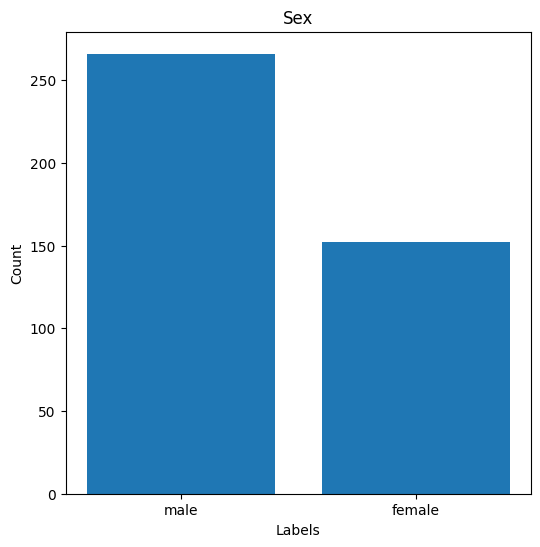

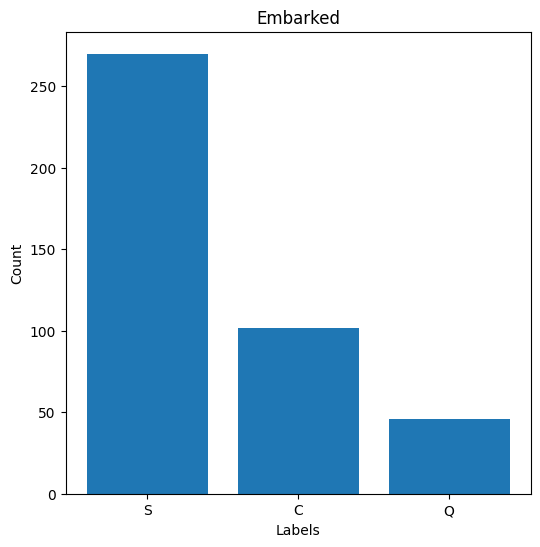

In [54]:
# 3. Bar Chart 
for i in cat_cols:
    keys=data[i].value_counts().keys()
    values=data[i].value_counts().values
    plt.figure(figsize=(6,6))
    plt.bar(keys,values)
    plt.xlabel('Labels')
    plt.ylabel('Count')
    plt.title(i)
    plt.show()

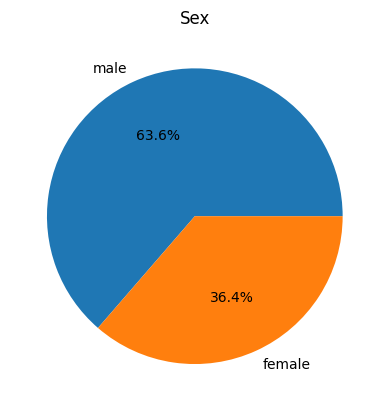

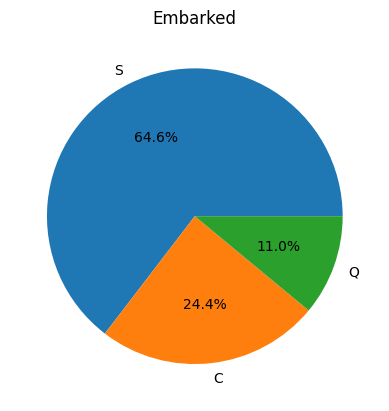

In [56]:
# 4. Pie Chart
for i in cat_cols:
    keys=data[i].value_counts().keys()
    values=data[i].value_counts().values
    plt.pie(values,labels=keys,autopct='%0.1f%%')
    plt.title(f'{i}')
    plt.show()

**7. Numerical column analysis**
- two ways
    - statical
    - data distribution  

In [59]:
# 1.Statical 
l=[]  
index=['Count', 'Min', 'Max', 'Mean', 'Median', 'Mode', 'Std', '25p', '50p', '75p']  
for i in num_cols:    
    count=data[i].count()
    minn=data[i].min()
    maxx=data[i].max()
    mean=data[i].mean()
    median=data[i].median()
    mode=data[i].mode()[0] if not data[i].mode().empty else np.nan  
    std=data[i].std()
    _25p=np.percentile(data[i].dropna(), 25)  
    _50p=np.percentile(data[i].dropna(), 50)
    _75p=np.percentile(data[i].dropna(), 75)
    data2=[count, minn, maxx, mean, median, mode, std, _25p, _50p, _75p]
    l.append(data2)
df=pd.DataFrame(l,index=num_cols,columns=index)
df


,Count,Min,Max,Mean,Median,Mode,Std,25p,50p,75p
PassengerId,418,892.00,1309.0000,1100.500000,1100.5000,892.00,120.810458,996.2500,1100.5000,1204.750000
Survived,418,0.00,1.0000,0.363636,0.0000,0.00,0.481622,0.0000,0.0000,1.000000
Pclass,418,1.00,3.0000,2.265550,3.0000,3.00,0.841838,1.0000,3.0000,3.000000
Age,418,0.17,76.0000,29.599282,27.0000,27.00,12.703770,23.0000,27.0000,35.750000
SibSp,418,0.00,8.0000,0.447368,0.0000,0.00,0.896760,0.0000,0.0000,1.000000
Parch,418,0.00,9.0000,0.392344,0.0000,0.00,0.981429,0.0000,0.0000,0.000000
Fare,418,0.00,512.3292,35.576535,14.4542,7.75,55.850103,7.8958,14.4542,31.471875


In [61]:
data.describe()  #gives the summary of all coloumns

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,0.363636,2.265550,29.599282,0.447368,0.392344,35.576535
std,120.810458,0.481622,0.841838,12.703770,0.896760,0.981429,55.850103
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,35.750000,1.000000,0.000000,31.471875
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


**8.Outlire Analysis*
- Box plot.

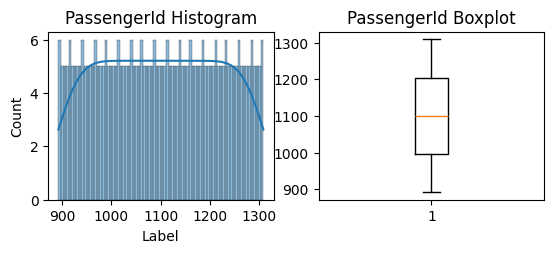

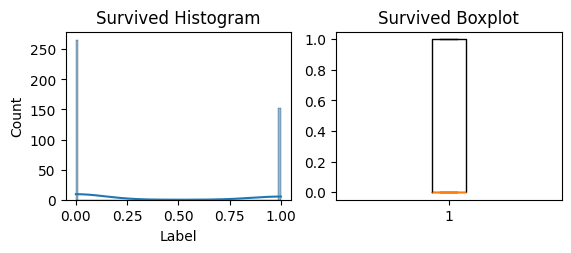

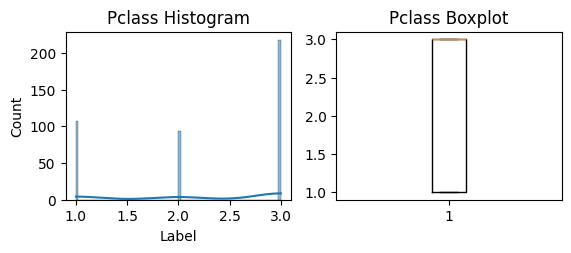

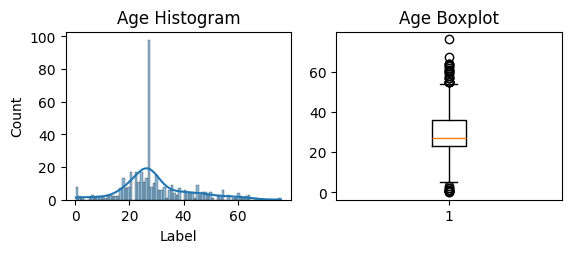

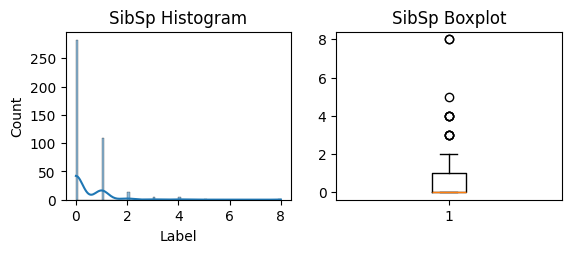

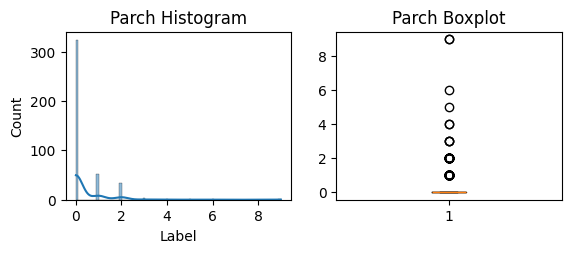

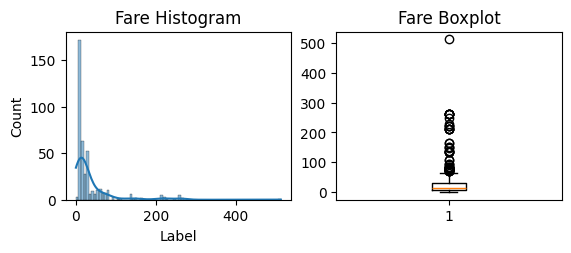

In [64]:
for i in num_cols:
    plt.subplot(2,2,1)
    sns.histplot(data[i],bins=80,kde=True)
    plt.xlabel('Label')
    plt.ylabel('Count')
    plt.title(f'{i} Histogram')
    plt.subplot(2,2,2)
    plt.boxplot(data[i])
    plt.title(f'{i} Boxplot')
    plt.show()

**Outlier Data**

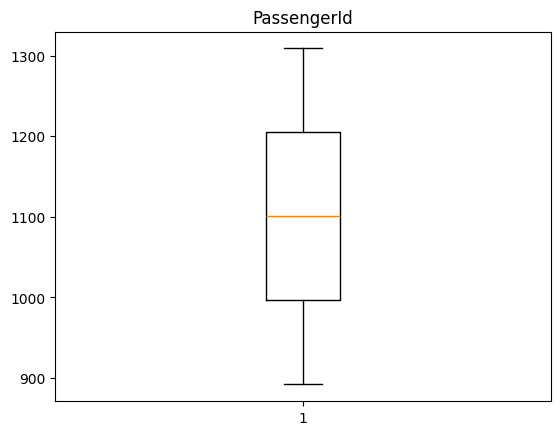

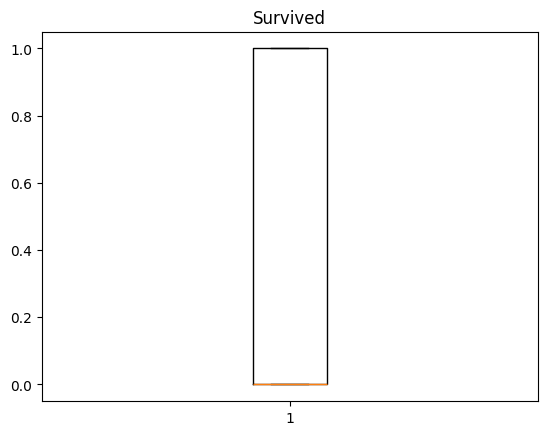

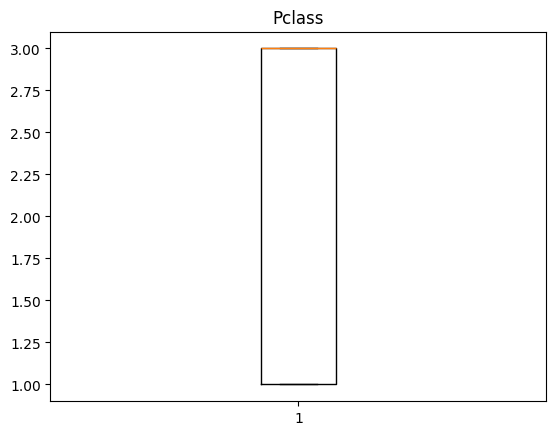

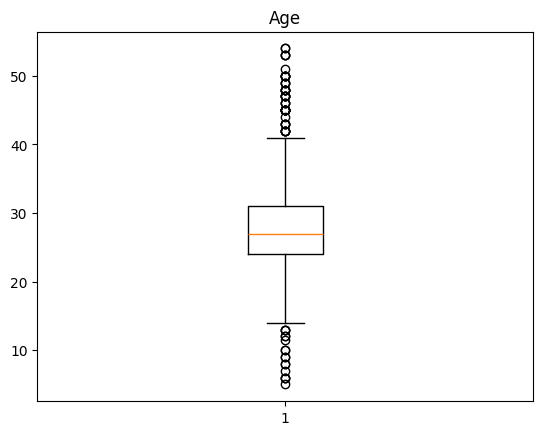

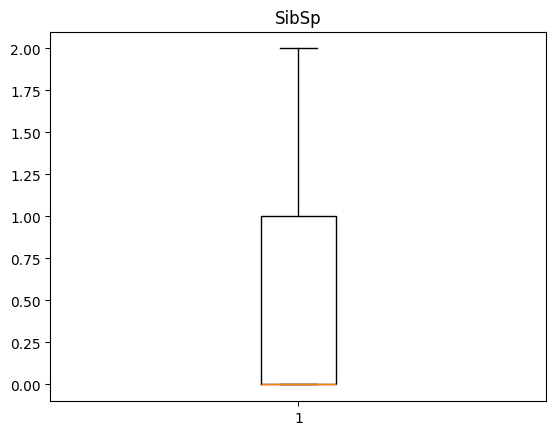

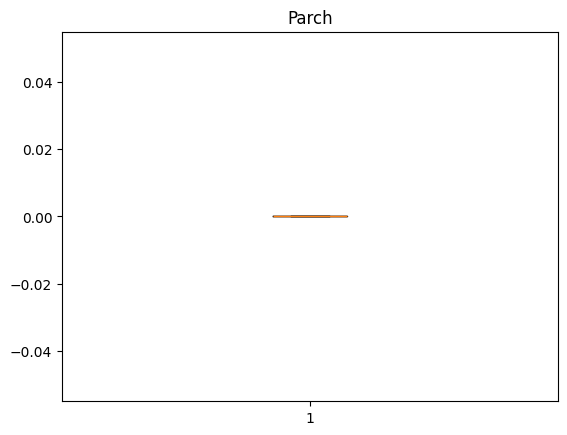

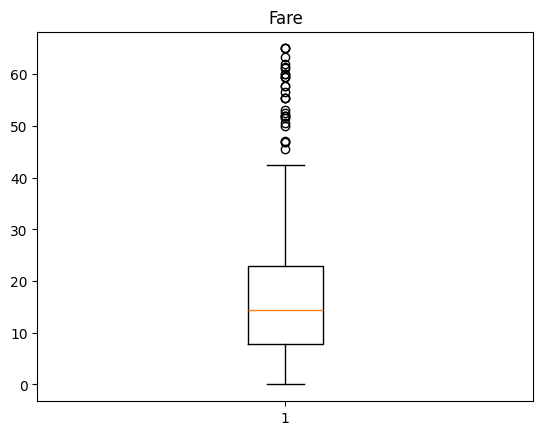

In [66]:
for i in num_cols:
    Q1=np.percentile(data[i],25)
    Q2=np.percentile(data[i],50)
    Q3=np.percentile(data[i],75)
    IQR=Q3-Q1
    lb=Q1-1.5*IQR
    ub=Q3+1.5*IQR
    con1=data[i]<lb
    con2=data[i]>ub
    con=con1|con2
    new_data=np.where(con,Q2,data[i])
    data[i]=new_data
for i in num_cols:
    plt.boxplot(data[i])
    plt.title(i)
    plt.show()

**Non-Outlier Data**

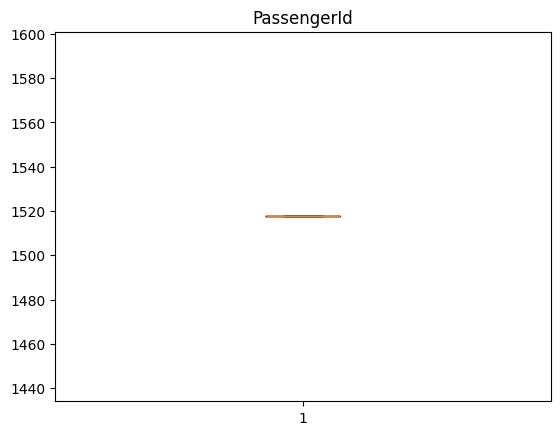

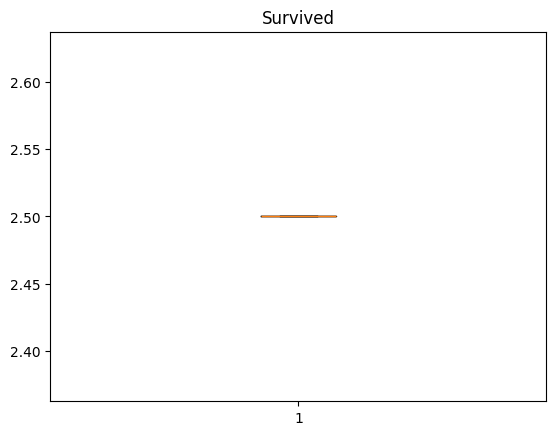

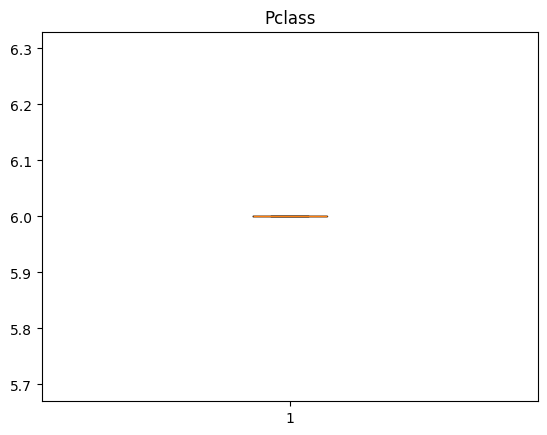

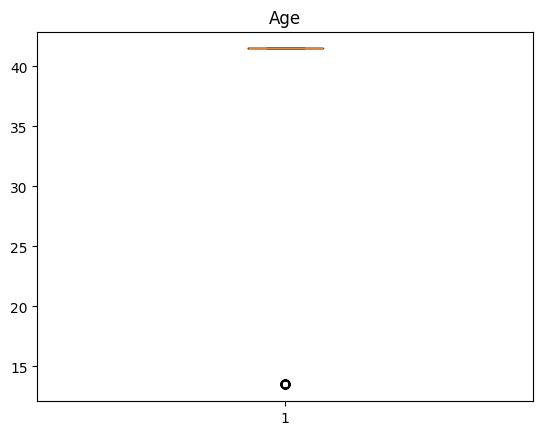

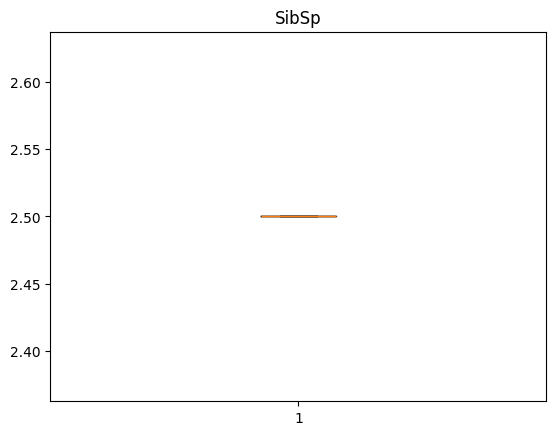

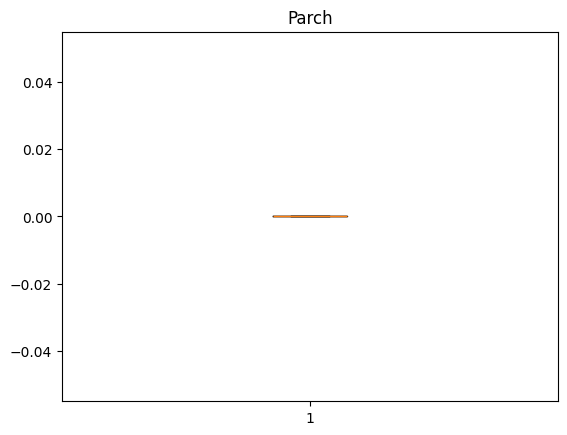

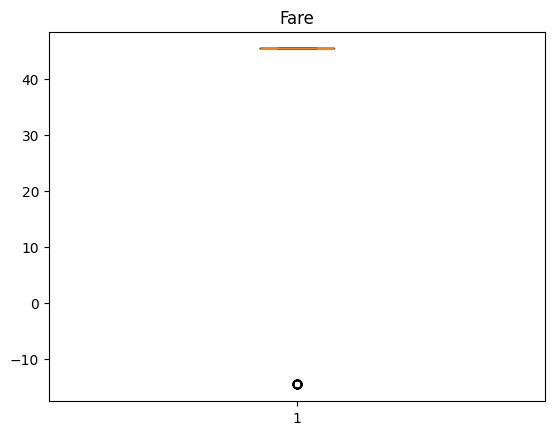

In [70]:
for i in num_cols:
    Q1=np.percentile(data[i],25)
    Q2=np.percentile(data[i],50)
    Q3=np.percentile(data[i],75)
    IQR=Q3-Q1
    lb=Q1-1.5*IQR
    ub=Q3+1.5*IQR
    con1=data[i]>lb
    con2=data[i]<ub
    new_data = np.where(con1, lb, data[i])
    data[i] = new_data
    new_data = np.where(con2, ub, data[i])
    data[i] = new_data
for i in num_cols:
    plt.boxplot(data[i])
    plt.title(i)
    plt.show()

**9. Bi variate and Multi variate**

**Numerical**

**Pearson Correlation Coefficient**
- r varies from -1 to 1
- -1 to 0 : Negative relation
- 0 to 1: Postive relation
- 0: No relation

In [75]:
data.corr(numeric_only=True)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Survived,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pclass,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,NaN,NaN,NaN,1.00000,NaN,NaN,0.13916
SibSp,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Parch,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,NaN,NaN,NaN,0.13916,NaN,NaN,1.00000


**Heatmap**

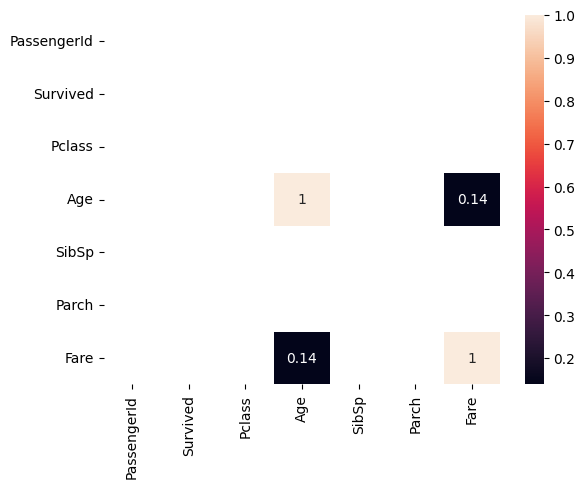

In [78]:
sns.heatmap(data.corr(numeric_only=True),annot=True)
plt.show()

**10. Convert Categorical to Numerical**

- In Machine learning it is very important to convert categorical data to numerical data
- Machine learning models develop by Maths
- Machine learning takes the input in the form of Numbers only
- To convert the we have some encoding techniques
    - Label Encoder
    - map
    - np.where
    - using sklearn package: LabelEncoder
- One hot encoder
    - using pandas package: pd.get_dummies
- map
    - Before applying map method first get the unique labels of the column

# ML Model Development

$Label$ $Encoder$

In [83]:
# Encode categorical variables
data['Sex']=LabelEncoder().fit_transform(data['Sex'])
data=pd.get_dummies(data,columns=['Embarked'],drop_first=True)

**Feature Engineering**

In [101]:
# Define feature set and target variable
X = data.drop('Survived',axis=1)
# Ensure target variable is categorical (0 or 1)
y = data['Survived'].astype(int)  # Convert to integer type

In [103]:
# Normalize numerical features
scaler = StandardScaler()
X[['Age','Fare']]=scaler.fit_transform(X[['Age','Fare']])

In [105]:
# Split dataset into training and testing sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

**Model Training**

In [108]:
# Initialize and train the Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [110]:
# Make predictions
y_pred = model.predict(X_test)

In [112]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 1.00


In [114]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           2       1.00      1.00      1.00        84

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84

